In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df1 = df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df1.drop(['Id'], inplace=True, axis=1)

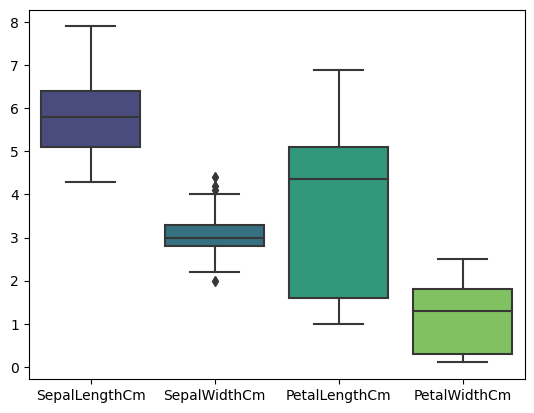

In [8]:
sns.boxplot(df1, palette = 'viridis');

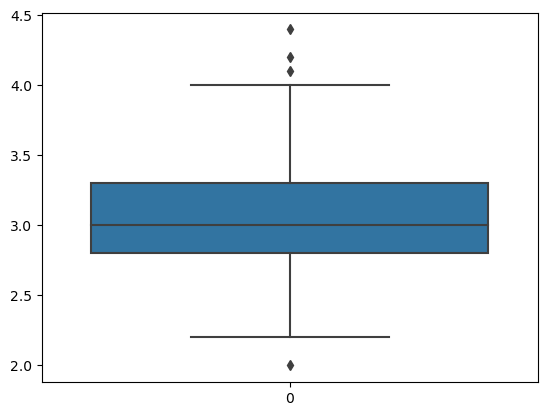

In [9]:
sns.boxplot(df1['SepalWidthCm']);

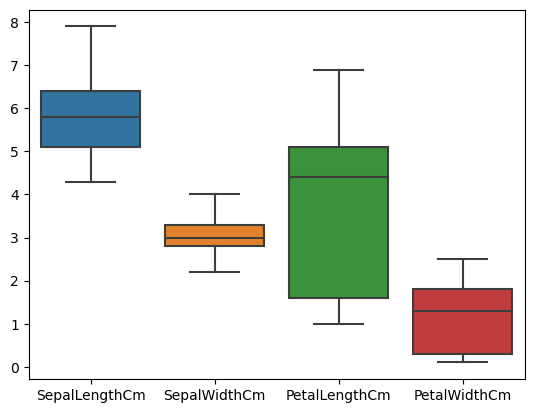

In [10]:
outliers = []
for i in df1.index:
    if (df1['SepalWidthCm'][i] < 2.2 or df1['SepalWidthCm'][i] > 4):
        outliers.append(i)
        
df1 = df1.drop(outliers)

sns.boxplot(df1);

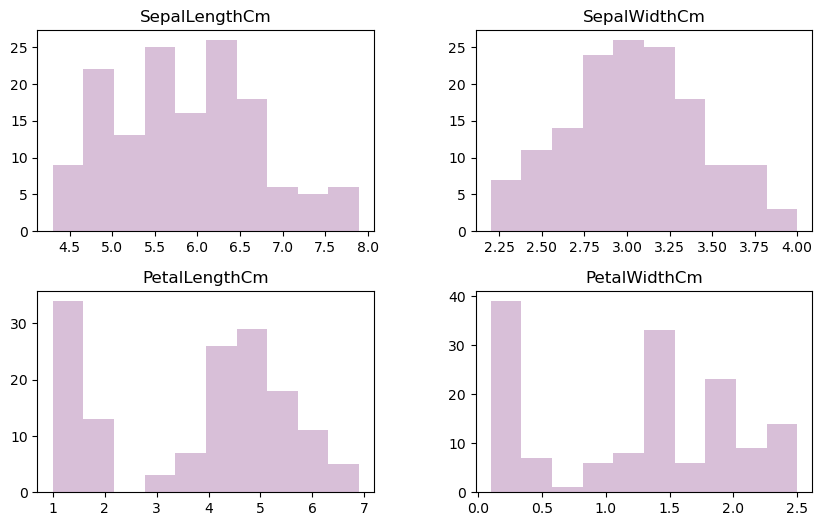

In [11]:
df1.hist(bins=10, figsize=(10,6), color = 'thistle', grid = False);

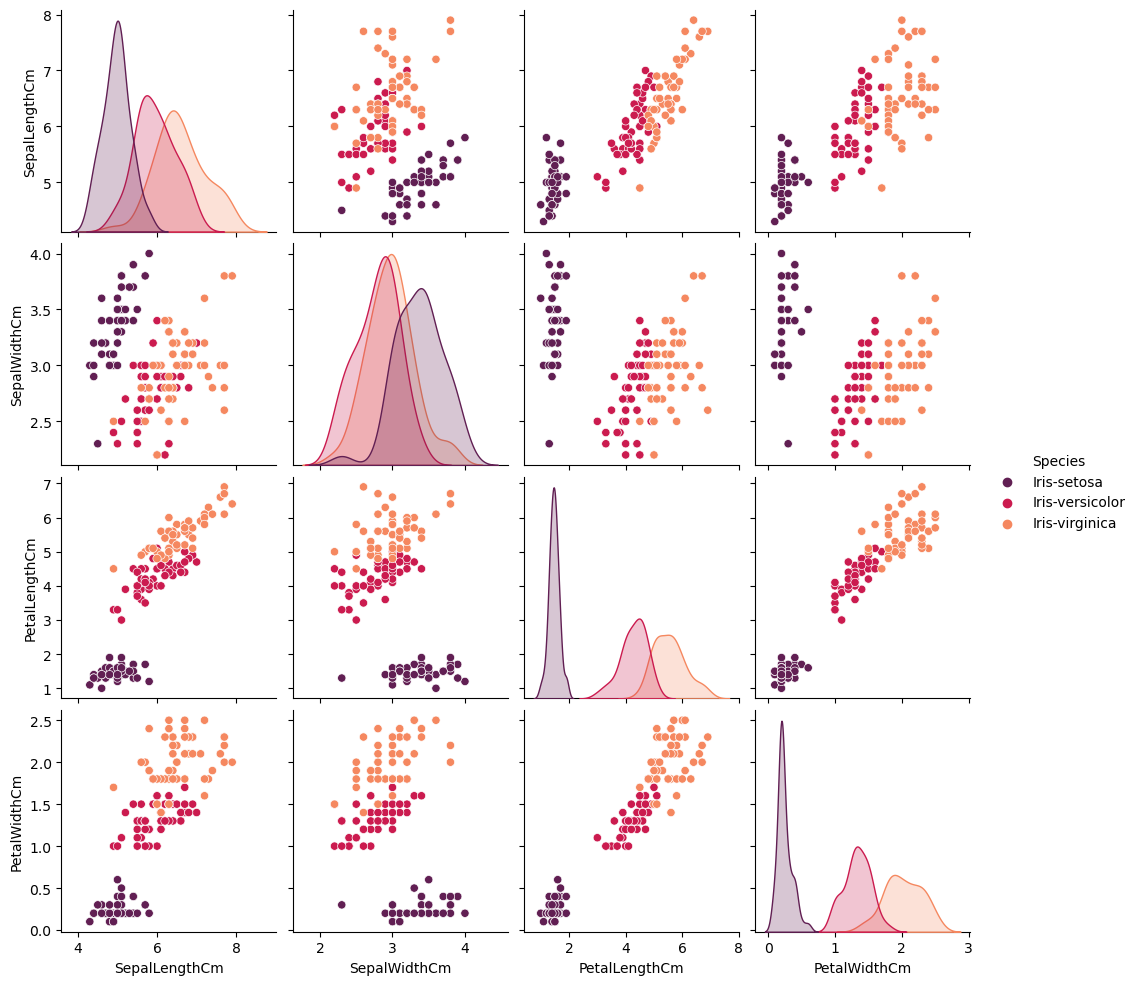

In [12]:
sns.pairplot(df1, diag_kind = 'kde', hue = 'Species', palette = 'rocket');

<Axes: >

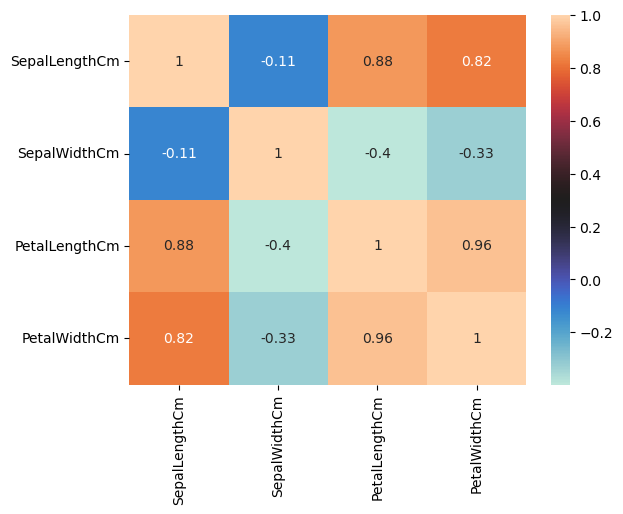

In [13]:
mtx = df1.corr()
sns.heatmap(mtx, annot=True, cmap= sns.color_palette("icefire", as_cmap=True))

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
X = df1.drop(['Species'], axis = 1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)

C:\Users\CG Lapy 2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


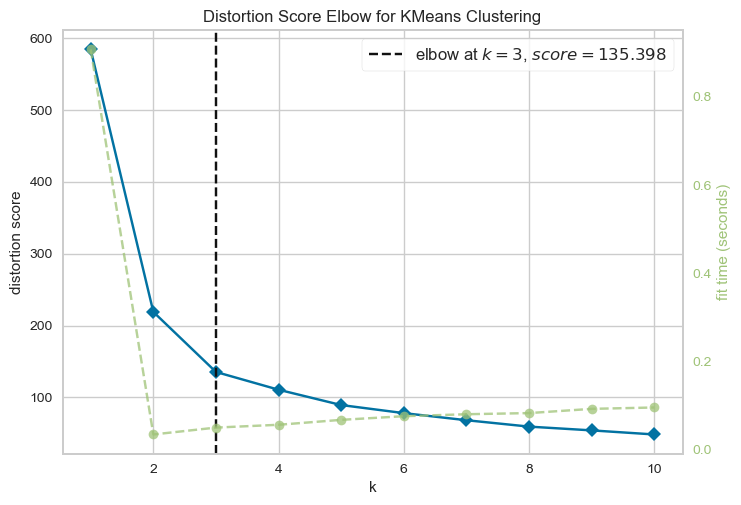

In [16]:
# finding the optimal value of k

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(1,11))
viz.fit(X_pca)
viz.show();

In [17]:
kmeans = KMeans(n_clusters = 3)
pred = kmeans.fit_predict(X_pca)

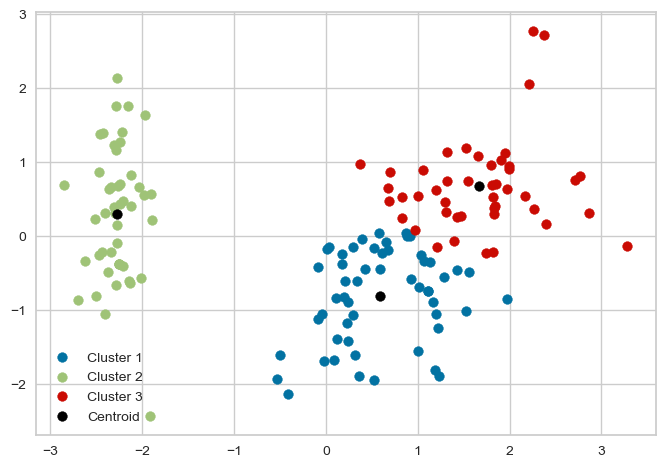

In [18]:
plt.scatter(X_pca[pred==0,0], X_pca[pred==0,1], label = 'Cluster 1')
plt.scatter(X_pca[pred==1,0], X_pca[pred==1,1], label = 'Cluster 2')
plt.scatter(X_pca[pred==2,0], X_pca[pred==2,1], label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label = 'Centroid', c='black')
plt.legend();